### Background:

### A company recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding type, called “maximum bidding”. One of our clients, ….com, has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding.

### The A/B test has run for 1 month and ….com now expects you to analyze and present the results of this A/B test.

### IMPORTING LYBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

### Loading datasets

In [2]:
df_test = pd.read_csv('C:/Users/HP/Downloads/yearly1.csv')


In [3]:
df_test.head()

,Campaign_name,Date,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase
0,Test Campaign,1.08.2019,3008.0,39550.0,56930.0,3038.0,1946.0,1069.0,894.0,255.0
1,Test Campaign,2.08.2019,2542.0,100719.0,102513.0,4657.0,2359.0,1548.0,879.0,677.0
2,Test Campaign,3.08.2019,2365.0,70263.0,110862.0,7885.0,2572.0,2367.0,1268.0,578.0
3,Test Campaign,4.08.2019,2710.0,78451.0,61235.0,4216.0,2216.0,1437.0,566.0,340.0
4,Test Campaign,5.08.2019,2297.0,114295.0,NaN,5863.0,2106.0,858.0,956.0,768.0


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign_name  30 non-null     object 
 1   Date           30 non-null     object 
 2   Spend_usd      30 non-null     float64
 3   Impressions    30 non-null     float64
 4   Reach          29 non-null     float64
 5   Websiteclicks  30 non-null     float64
 6   Searches       30 non-null     float64
 7   Viewcontent    30 non-null     float64
 8   Addtocart      30 non-null     float64
 9   Purchase       30 non-null     float64
dtypes: float64(8), object(2)
memory usage: 78.2+ KB


In [5]:
df_test.isnull().sum()

Campaign_name    969
Date             969
Spend_usd        969
Impressions      969
Reach            970
Websiteclicks    969
Searches         969
Viewcontent      969
Addtocart        969
Purchase         969
dtype: int64

In [6]:
df_test.shape

(999, 10)

In [7]:
#change datatypes
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d.%m.%Y')
df_test.iloc[:,2:10] = df_test.iloc[:,2:10].apply(pd.to_numeric)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Campaign_name  30 non-null     object        
 1   Date           30 non-null     datetime64[ns]
 2   Spend_usd      30 non-null     float64       
 3   Impressions    30 non-null     float64       
 4   Reach          29 non-null     float64       
 5   Websiteclicks  30 non-null     float64       
 6   Searches       30 non-null     float64       
 7   Viewcontent    30 non-null     float64       
 8   Addtocart      30 non-null     float64       
 9   Purchase       30 non-null     float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 78.2+ KB


In [8]:
df_test.describe()

,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase
count,30.000000,30.000000,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,88844.931034,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,21832.349595,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,42859.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,74192.000000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,91579.000000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,102479.000000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,127852.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [9]:
df_control=pd.read_csv('C:/Users/HP/Downloads/mark1.csv')

In [10]:
df_control.head()

,Campaign_name,Date,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase,Purchase.1
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_control=df_control.iloc[:,[0,1,2,3,4,5,6,7,8,9,]]

In [12]:
df_control.head()

,Campaign_name,Date,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign_name  27 non-null     object 
 1   Date           27 non-null     object 
 2   Spend_usd      27 non-null     int64  
 3   Impressions    26 non-null     float64
 4   Reach          26 non-null     float64
 5   Websiteclicks  26 non-null     float64
 6   Searches       26 non-null     float64
 7   Viewcontent    26 non-null     float64
 8   Addtocart      26 non-null     float64
 9   Purchase       26 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.2+ KB


In [14]:
#change datatypes
df_control['Date'] = pd.to_datetime(df_control['Date'], format='%d.%m.%Y')
df_control.iloc[:,2:10] = df_control.iloc[:,2:10].apply(pd.to_numeric)
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Campaign_name  27 non-null     object        
 1   Date           27 non-null     datetime64[ns]
 2   Spend_usd      27 non-null     int64         
 3   Impressions    26 non-null     float64       
 4   Reach          26 non-null     float64       
 5   Websiteclicks  26 non-null     float64       
 6   Searches       26 non-null     float64       
 7   Viewcontent    26 non-null     float64       
 8   Addtocart      26 non-null     float64       
 9   Purchase       26 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.2+ KB


In [15]:
#There is a row with missing values. Let's fill the missing values with K-Nearest Neighbor.
imputer = KNNImputer(weights='distance')
df_control.iloc[:,2:10]=pd.DataFrame(imputer.fit_transform(df_control.iloc[:,2:10]))

In [16]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Campaign_name  27 non-null     object        
 1   Date           27 non-null     datetime64[ns]
 2   Spend_usd      27 non-null     float64       
 3   Impressions    27 non-null     float64       
 4   Reach          27 non-null     float64       
 5   Websiteclicks  27 non-null     float64       
 6   Searches       27 non-null     float64       
 7   Viewcontent    27 non-null     float64       
 8   Addtocart      27 non-null     float64       
 9   Purchase       27 non-null     float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 2.2+ KB


In [17]:
df_control.describe()

,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase
count,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2279.00000,108576.743688,87703.272080,5220.902161,2162.488799,1898.386805,1312.019650,522.693926
std,386.52137,21402.410025,21303.816618,1722.328855,710.324375,653.019793,377.699025,185.285789
min,1757.00000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,645.000000,222.000000
25%,1920.00000,95133.539791,73419.500000,4056.500000,1553.000000,1199.000000,955.000000,379.000000
50%,2233.00000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2570.00000,121186.000000,101438.500000,6591.000000,2599.000000,2300.000000,1635.000000,676.000000
max,3083.00000,145248.000000,127852.000000,8137.000000,3549.000000,3249.000000,1913.000000,800.000000


In [18]:
#Combine two datasets into one and add new features for metrics evaluation
df = pd.concat([df_test,df_control])
df = df.reset_index()
df.head()

,index,Campaign_name,Date,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase
0,0,Test Campaign,2019-08-01,3008.0,39550.0,56930.0,3038.0,1946.0,1069.0,894.0,255.0
1,1,Test Campaign,2019-08-02,2542.0,100719.0,102513.0,4657.0,2359.0,1548.0,879.0,677.0
2,2,Test Campaign,2019-08-03,2365.0,70263.0,110862.0,7885.0,2572.0,2367.0,1268.0,578.0
3,3,Test Campaign,2019-08-04,2710.0,78451.0,61235.0,4216.0,2216.0,1437.0,566.0,340.0
4,4,Test Campaign,2019-08-05,2297.0,114295.0,NaN,5863.0,2106.0,858.0,956.0,768.0


In [19]:
df['Spend_purchase'] = round(df['Spend_usd']/df['Purchase'],2)




In [20]:
df['Spend_purchase'].head()

0    11.80
1     3.75
2     4.09
3     7.97
4     2.99
Name: Spend_purchase, dtype: float64

In [21]:
df['Ctr%'] = round(df['Websiteclicks']*100/df['Impressions'],2)


In [22]:
df[ 'Ctr%'  ].head()

0     7.68
1     4.62
2    11.22
3     5.37
4     5.13
Name: Ctr%, dtype: float64

In [23]:
df['Conversion_rate%'] = round(df['Purchase']*100/df['Websiteclicks'],2)

In [24]:
df['Conversion_rate%'].head()

0     8.39
1    14.54
2     7.33
3     8.06
4    13.10
Name: Conversion_rate%, dtype: float64

In [25]:
df.head()

,index,Campaign_name,Date,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase,Spend_purchase,Ctr%,Conversion_rate%
0,0,Test Campaign,2019-08-01,3008.0,39550.0,56930.0,3038.0,1946.0,1069.0,894.0,255.0,11.80,7.68,8.39
1,1,Test Campaign,2019-08-02,2542.0,100719.0,102513.0,4657.0,2359.0,1548.0,879.0,677.0,3.75,4.62,14.54
2,2,Test Campaign,2019-08-03,2365.0,70263.0,110862.0,7885.0,2572.0,2367.0,1268.0,578.0,4.09,11.22,7.33
3,3,Test Campaign,2019-08-04,2710.0,78451.0,61235.0,4216.0,2216.0,1437.0,566.0,340.0,7.97,5.37,8.06
4,4,Test Campaign,2019-08-05,2297.0,114295.0,NaN,5863.0,2106.0,858.0,956.0,768.0,2.99,5.13,13.10


In [26]:
df.describe()

,index,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase,Spend_purchase,Ctr%,Conversion_rate%
count,1026.000000,57.000000,57.000000,56.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,486.210526,2428.508772,90686.247010,88294.488324,5647.971199,2297.477150,1877.130592,1085.447905,521.925193,5.477895,7.777895,10.377018
std,295.155365,390.900523,32252.057012,21390.156390,1748.163307,573.769752,619.173222,419.314339,197.498874,2.534917,5.696219,5.829014
min,0.000000,1757.000000,22521.000000,42859.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000,2.250000,1.860000,3.010000
25%,229.250000,2061.000000,67444.000000,72697.500000,4221.000000,1983.000000,1249.000000,878.000000,340.000000,3.460000,4.350000,6.360000
50%,485.500000,2458.000000,95843.000000,91579.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000,4.790000,6.380000,8.810000
75%,741.750000,2774.000000,117006.000000,102479.000000,7184.000000,2733.000000,2421.000000,1363.530560,709.000000,7.580000,8.420000,13.000000
max,998.000000,3112.000000,145248.000000,127852.000000,8264.000000,3549.000000,3249.000000,1913.000000,890.000000,12.700000,33.820000,32.240000


## Data Visualization

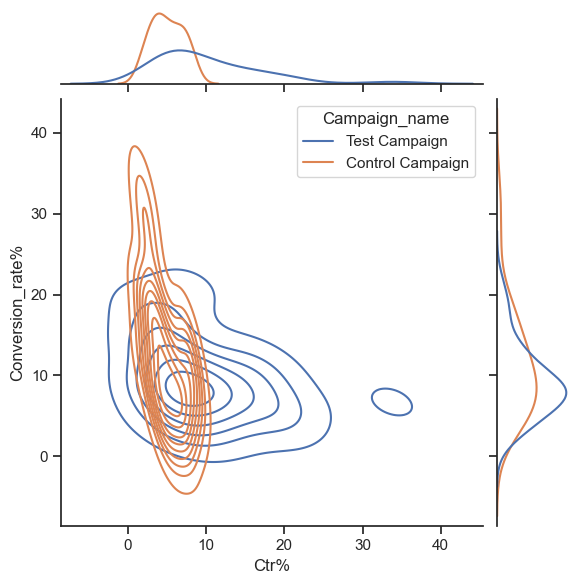

In [29]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Ctr%", y="Conversion_rate%", hue="Campaign_name",
    kind="kde",
)
plt.show()

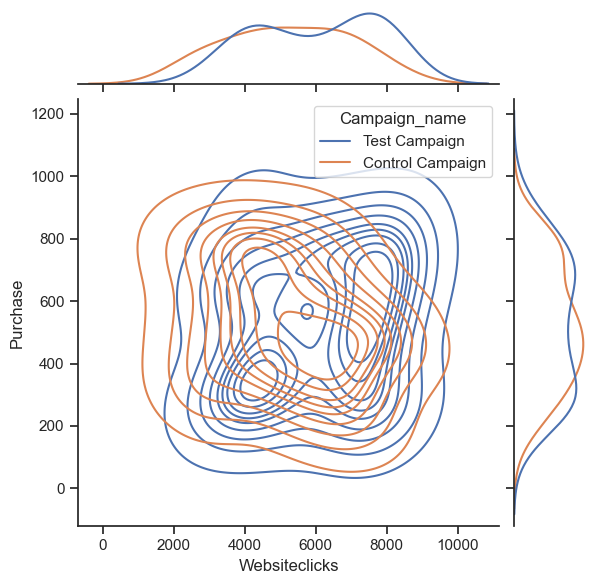

In [30]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Websiteclicks", y="Purchase", hue="Campaign_name",
    kind="kde",
)
plt.show()

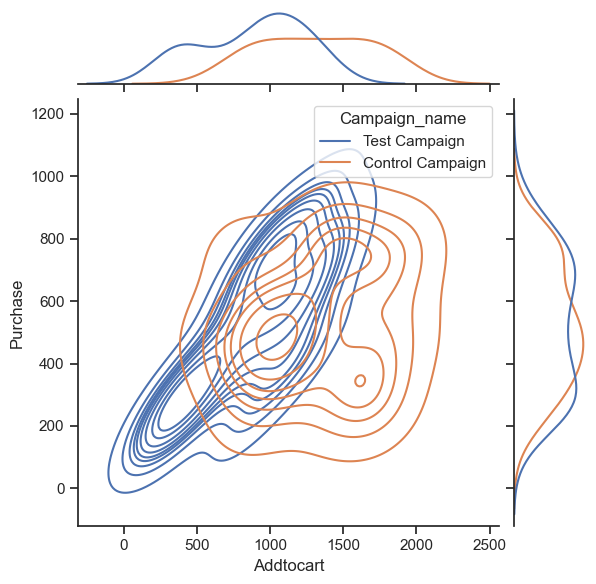

In [31]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Addtocart", y="purchase", hue="Campaign_name",
    kind="kde",
)
plt.show()

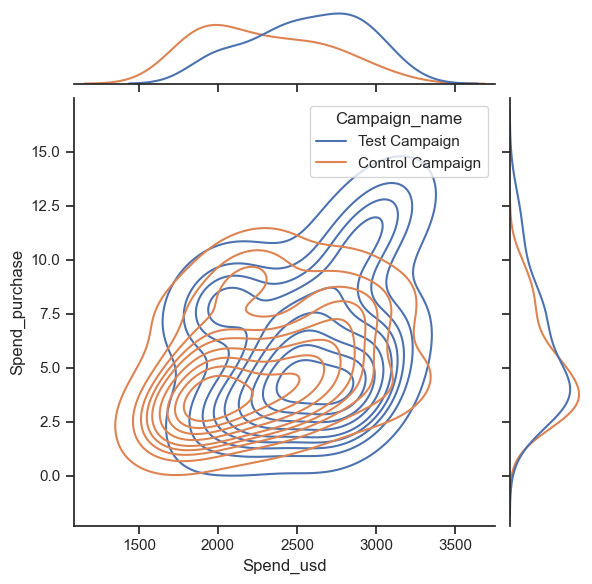

In [32]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Spend_usd", y="Spend_purchase", hue="Campaign_name",
    kind="kde",
)
plt.show()

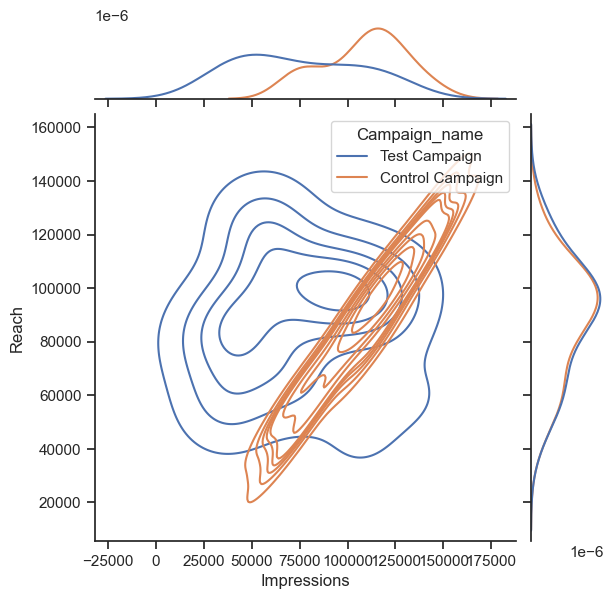

In [33]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Impressions", y="Reach", hue="Campaign_name",
    kind="kde",
)
plt.show()

In [34]:
total_spend = df.groupby(['Campaign_name'])['Spend_usd'].sum().reset_index()
total_spend

,Campaign_name,Spend_usd
0,Control Campaign,61533.0
1,Test Campaign,76892.0


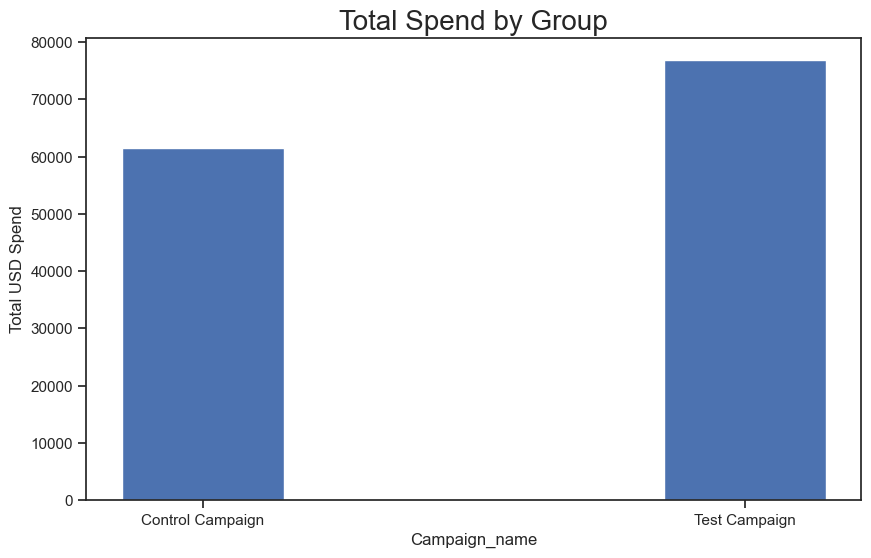

In [35]:
fig = plt.figure(figsize = (10, 6))
plt.bar(total_spend['Campaign_name'], total_spend['Spend_usd'], width = 0.3)
plt.xlabel("Campaign_name")
plt.ylabel("Total USD Spend")
plt.title("Total Spend by Group", fontdict = {'fontsize' : 20})
plt.show()

In [36]:
df.head(2)

,index,Campaign_name,Date,Spend_usd,Impressions,Reach,Websiteclicks,Searches,Viewcontent,Addtocart,Purchase,Spend_purchase,Ctr%,Conversion_rate%
0,0,Test Campaign,2019-08-01,3008.0,39550.0,56930.0,3038.0,1946.0,1069.0,894.0,255.0,11.80,7.68,8.39
1,1,Test Campaign,2019-08-02,2542.0,100719.0,102513.0,4657.0,2359.0,1548.0,879.0,677.0,3.75,4.62,14.54


In [37]:
spend_per_purchase = df.groupby(['Campaign_name'])['Spend_purchase'].mean().reset_index()
spend_per_purchase

,Campaign_name,Spend_purchase
0,Control Campaign,5.008889
1,Test Campaign,5.900000


In [39]:
spend_per_purchase_uplift = (5.900000-5.008889)/5.008889
spend_per_purchase_uplift

0.1779059188574553

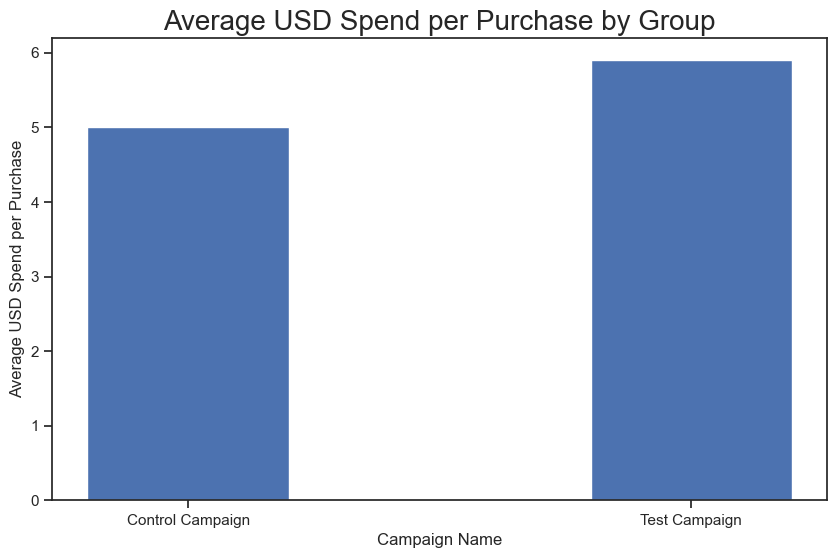

In [40]:
fig = plt.figure(figsize = (10,6))
plt.bar(spend_per_purchase['Campaign_name'], spend_per_purchase['Spend_purchase'], width = 0.4)
plt.xlabel("Campaign Name")
plt.ylabel("Average USD Spend per Purchase")
plt.title("Average USD Spend per Purchase by Group", fontdict = {'fontsize' : 20})
plt.show()

In [41]:
num_of_purchase = df.groupby(['Campaign_name'])['Purchase'].sum().reset_index()
num_of_purchase

,Campaign_name,Purchase
0,Control Campaign,14112.735991
1,Test Campaign,15637.000000


### Observation: The number of purchases made by each group is considerably close; however, the test group has shown an uplift of more than 18% in the amount spent per purchase and therefore has a higher amount of total spend.

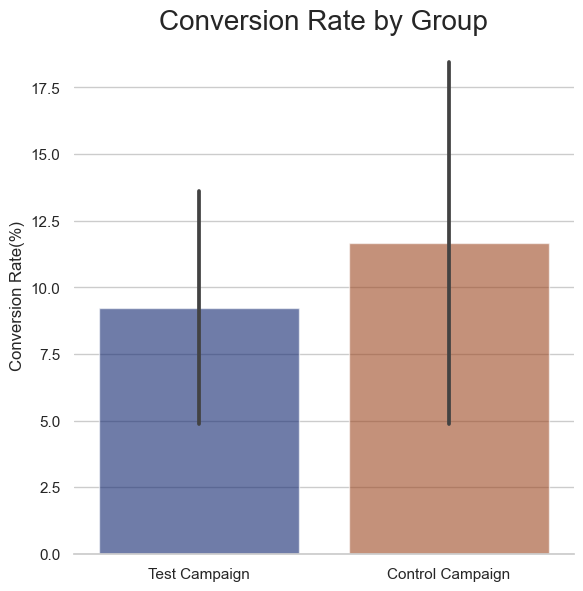

In [42]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",x="Campaign_name",
    y="Conversion_rate%",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Conversion Rate(%)")
plt.title('Conversion Rate by Group', fontdict = {'fontsize' : 20})
plt.show()

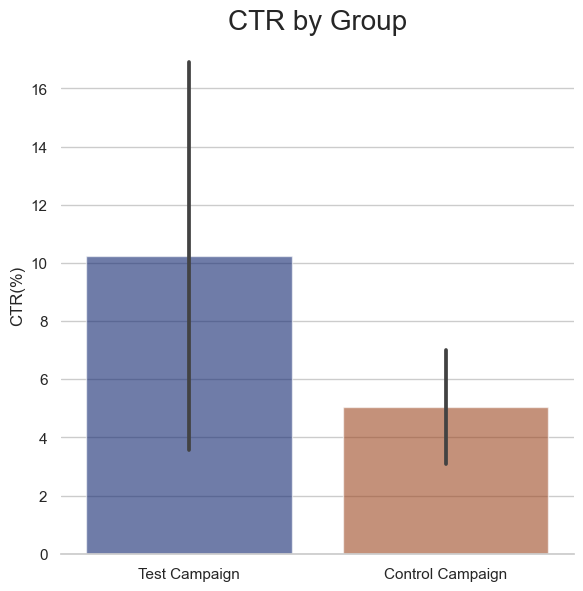

In [43]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",x="Campaign_name",
    y="Ctr%",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "CTR(%)")
plt.title('CTR by Group', fontdict = {'fontsize' : 20})
plt.show()

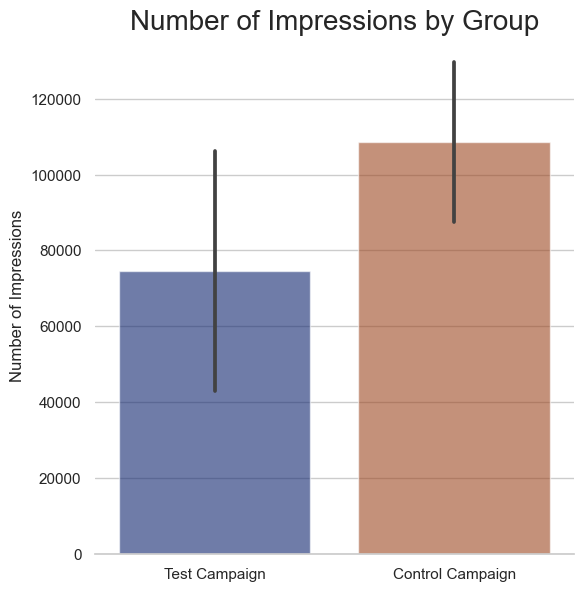

In [44]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",x="Campaign_name",
    y="Impressions",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of Impressions")
plt.title('Number of Impressions by Group', fontdict = {'fontsize' : 20})
plt.show()

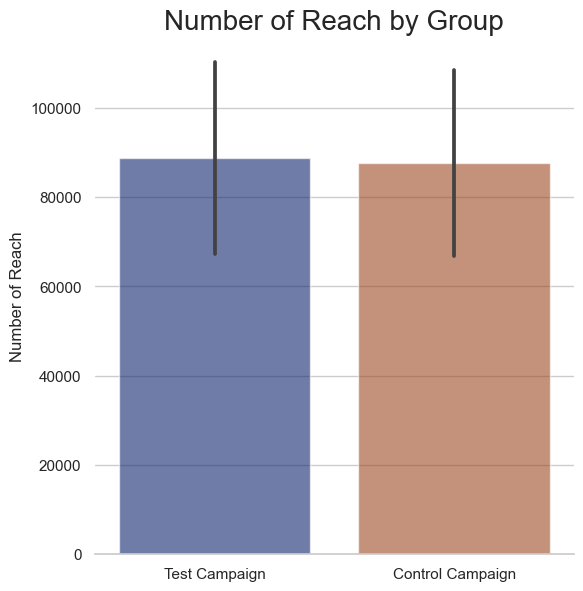

In [45]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",x="Campaign_name",
    y="Reach",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of Reach")
plt.title('Number of Reach by Group', fontdict = {'fontsize' : 20})
plt.show()

### Obervation: The Control Group has more impressions and reaches, while the Test Group has a higher Click-Through Rate.

## Running T test
## As the goal of this A/B test is to figure out whether the new bidding type is bringing more conversions. Let's focus on the conversion rate.

## Plot the Data Distribution

In [46]:
df_2 = df.copy()
df_2 = df_2.drop(['index','Date'], axis=1)
df_2['Campaign_name'] = pd.get_dummies(df_2['Campaign_name'], drop_first=True)
df_2 = df_2.reset_index(drop=True)
test_g = df_2[df_2['Campaign_name']==1]
control_g = df_2[df_2['Campaign_name']==0]

In [47]:
test_group = test_g['Conversion_rate%']
control_group = control_g['Conversion_rate%']
test_group.describe()

count    30.000000
mean      9.230667
std       4.449266
min       3.010000
25%       6.570000
50%       8.450000
75%      11.667500
max      21.090000
Name: Conversion_rate%, dtype: float64

In [48]:
control_group.describe()

count    27.000000
mean     11.650741
std       6.921049
min       3.350000
25%       6.330000
50%      10.440000
75%      14.470000
max      32.240000
Name: Conversion_rate%, dtype: float64

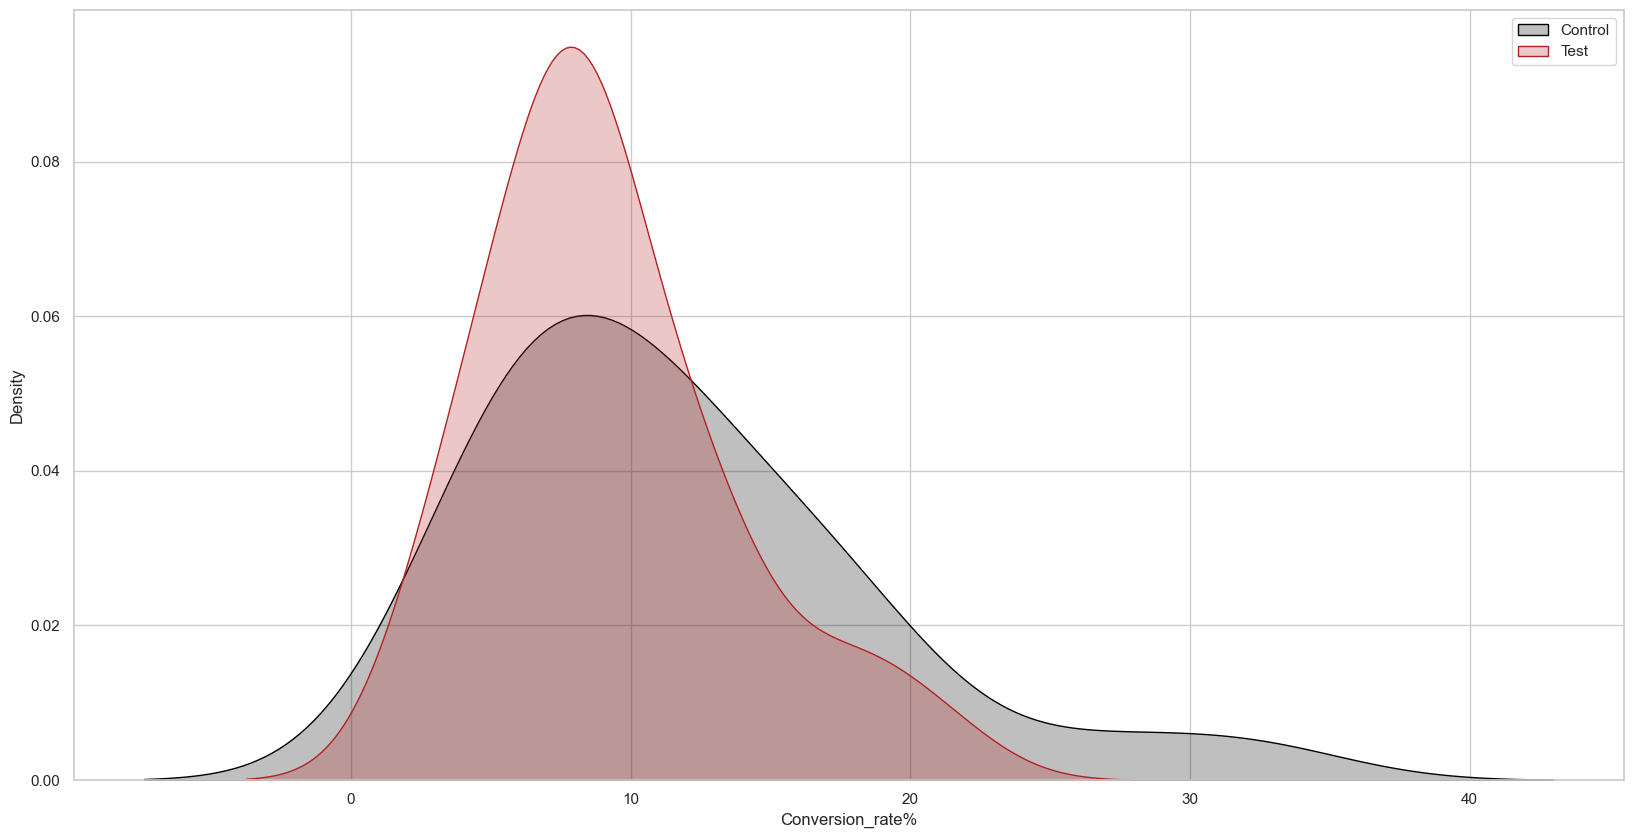

In [49]:
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group, label="Test", shade = True, color = '#B22222')
plt.legend()

### The data is not normally distributed. The long tail implies that outliers exist. Let's detect and remove the outliers.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Conversion_rate%'>

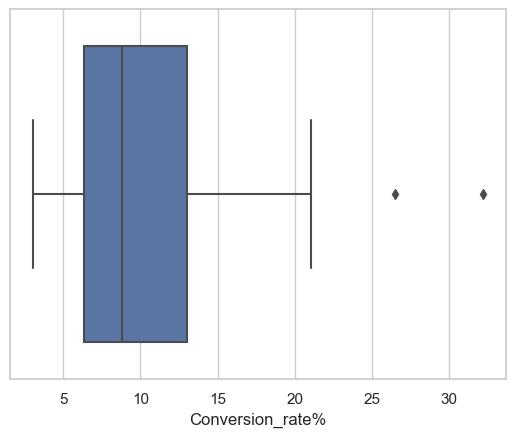

In [50]:
sns.boxplot(df['Conversion_rate%'])

### In the boxplot, we can see the values above 25 are acting as the outliers.

In [51]:
print(np.where(df['Conversion_rate%']>25))

(array([1008, 1010], dtype=int64),)


In [53]:
#remove the outliers
df_2 = df_2[df_2['Conversion_rate%']<25]
test_g = df_2[df_2['Campaign_name']==1]
control_g = df_2[df_2['Campaign_name']==0]
test_group = test_g['Conversion_rate%']
control_group = control_g['Conversion_rate%']

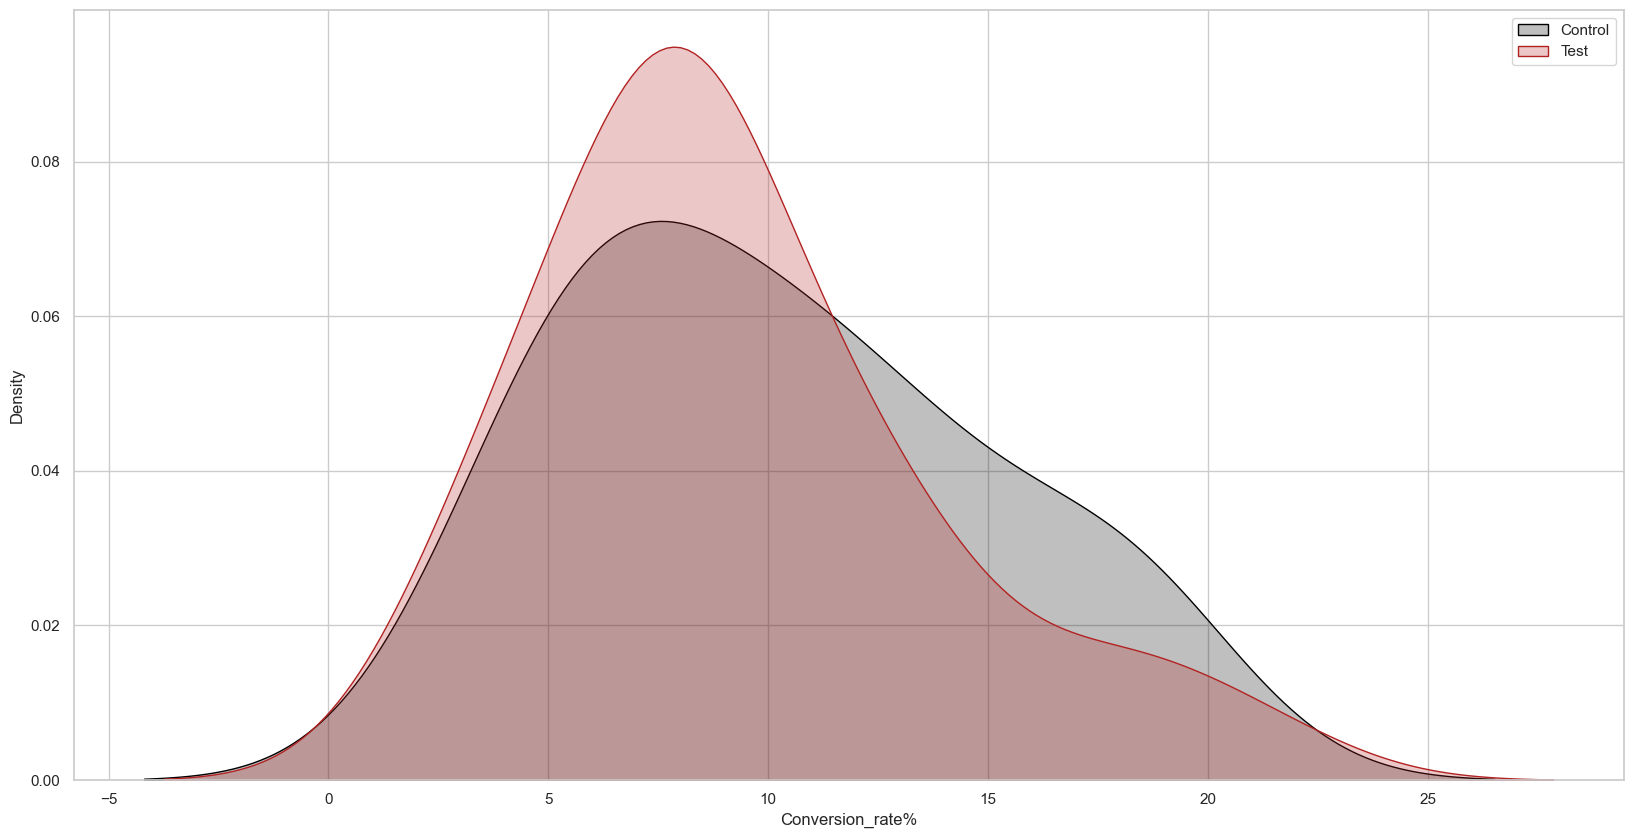

In [54]:
#now plot the data distribution again
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group, label="Test", shade = True, color = '#B22222')
plt.legend()

### Now the data distribution is close to normal, let's run the t test.

In [55]:
## H0: A = B  - Null Hypothesis
## H1: A != B  - Alternative Hypothesis
# set ⍺ = 0.05
test = stats.ttest_ind(test_group,control_group, equal_var = True)

print(test)

Ttest_indResult(statistic=-0.8029835014334694, pvalue=0.4255706959707486)


## Conclusion: p value > 0.05, Null Hypothesis is accepted. The new bidding type is not bringing higher conversion rate.